---
## _Task 3: EXPLORATORY DATA ANALYSIS (MALL CUSTOMERS)_
## _Author: SANDHYA S_
### _Problem Statement:_
#### * _Perform ‘Exploratory Data Analysis’ on dataset ‘Mallcustomers’_
#### * _As a business manager, try to find out following:_
> ##### a) Find a range of customers according to age group in Mall_customers.
> ##### b) Relation between age and Spending Score and Annual Income
> ##### c) Also form cluster of Annual Income vs Spending Score and give your reading accordingly.
### _Dataset: https://bit.ly/3hCM1ht_
---

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Renaming columns 
data = data.rename(columns={'CustomerID': 'Id', 'Genre': 'Gender', 'Annual Income (k$)': 'Annual_Income',
                           'Spending Score (1-100)': 'Spending_Score'}).set_index('Id')
data

,Gender,Age,Annual_Income,Spending_Score
Id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
# Checking for Null Values
data.isna().sum().to_frame('Null Values')

,Null Values
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


In [5]:
# Structure of Data
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
# Statistics of data
data.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


---

### _a) Find a range of customers according to age group in Mall customers._

In [8]:
print('Minimum Age:', data.Age.min())
print('Maximum Age:', data.Age.max())

Minimum Age: 18
Maximum Age: 70


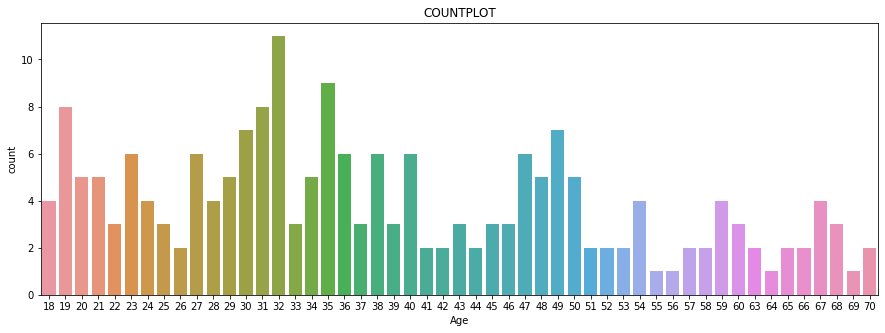

In [9]:
plt.figure(figsize=(15, 5))
plt.title('COUNTPLOT')
sns.countplot(data.Age)
plt.show()

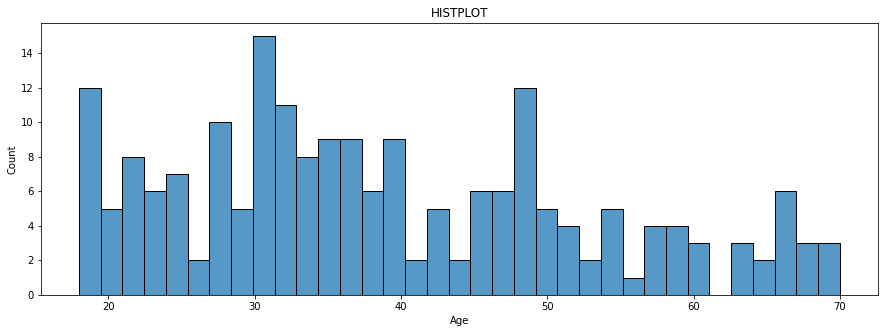

In [10]:
plt.figure(figsize=(15, 5))
plt.title('HISTPLOT')
sns.histplot(data.Age, bins=35)
plt.show()

---
### _b) Relation between age and Spending Score and Annual Income_

In [11]:
corr = data[['Age', 'Spending_Score', 'Annual_Income']].corr()
corr

,Age,Spending_Score,Annual_Income
Age,1.000000,-0.327227,-0.012398
Spending_Score,-0.327227,1.000000,0.009903
Annual_Income,-0.012398,0.009903,1.000000


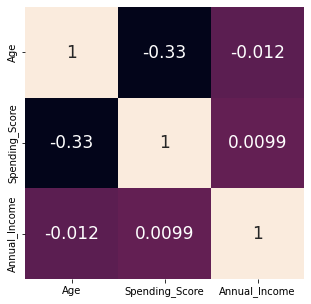

In [12]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr, cbar=False, annot_kws={'fontsize':'17'}, annot=True)
plt.show()

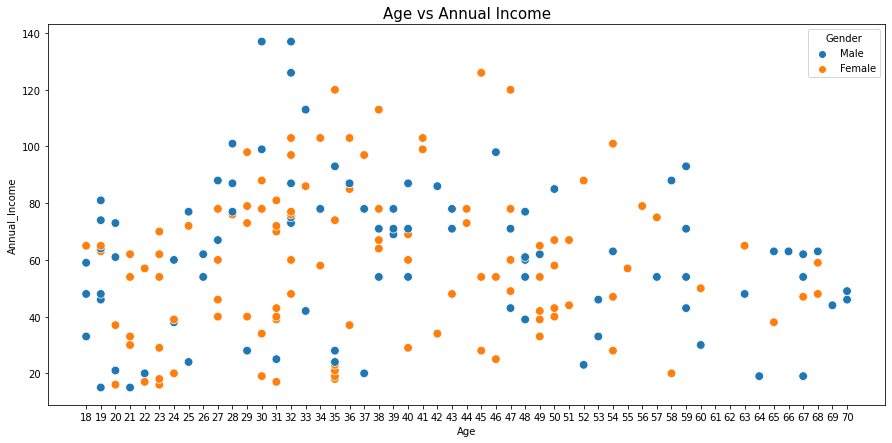

In [13]:
plt.figure(figsize=(15,7))
sns.scatterplot(data.Age, data.Annual_Income, hue=data.Gender, s=75)
plt.title('Age vs Annual Income', fontsize=15)
plt.xticks([x for x in range(18, 71, 1)])
plt.show()

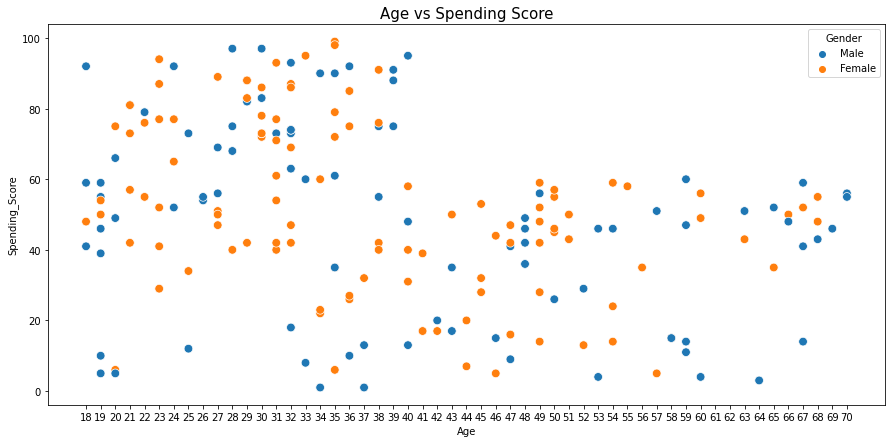

In [14]:
plt.figure(figsize=(15,7))
sns.scatterplot(data.Age, data.Spending_Score, hue=data.Gender, s=75)
plt.title('Age vs Spending Score', fontsize=15)
plt.xticks([x for x in range(18, 71, 1)])
plt.show()

---
### _c) Form cluster of Annual Income vs Spending Score and give your reading accordingly._

# _K-Means Clustering_

In [15]:
# Importing Libraries
from sklearn.cluster import KMeans
from sklearn import metrics

In [16]:
# Preparing Data - Annual Income & Spending Score are taken
X = data.iloc[:, 2:].values

### * _Optimum number of Clusters using Silhouette Score_

In [17]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    y_means = kmeans.fit_predict(X)
    print(f'Silhouette Score for n={i}: {np.round(metrics.silhouette_score(X, y_means), decimals=3)}')

Silhouette Score for n=2: 0.297
Silhouette Score for n=3: 0.468
Silhouette Score for n=4: 0.493
Silhouette Score for n=5: 0.554
Silhouette Score for n=6: 0.538
Silhouette Score for n=7: 0.526
Silhouette Score for n=8: 0.457
Silhouette Score for n=9: 0.456


#### _Silhouette Score is maximum at n = 5, therefore the number of clusters is 5._

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_means = kmeans.fit_predict(X)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
# Cluster Centroid points
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

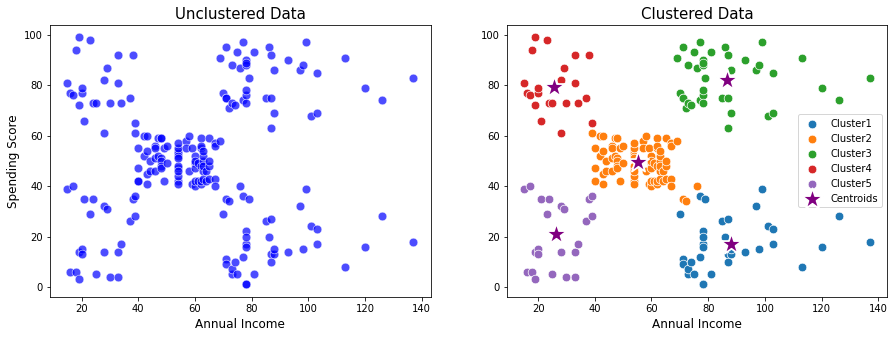

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Unclustered Data', fontsize=15)
ax[0].set_xlabel('Annual Income', fontsize=12)
ax[0].set_ylabel('Spending Score', fontsize=12)
sns.scatterplot(data.iloc[:, 2], data.iloc[:, -1], ax=ax[0], s=75, color='blue', alpha=0.7)
ax[1].set_title('Clustered Data', fontsize=15)
ax[1].set_xlabel('Annual Income', fontsize=12)
for i in range(0, 5):
    sns.scatterplot(X[y_means==i, 0], X[y_means==i, 1], s=75, label='Cluster'+str(i+1), ax=ax[1])
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, marker='*', 
                color='purple', label='Centroids', ax=ax[1])
fig.show()

---
## _Thank You!_